![](https://raw.githubusercontent.com/wilocw/co2114-codebase/2024/static/0/uol_banner_red.png)

# CO2114<br />Foundations in Artificial Intelligence

# Tutorial 3 - Shortest Path


##

> **Run the following cell if you are using Google Colab**

In [ ]:
!pip install "git+https://github.com/wilocw/co2114-codebase.git@2024#egg=agent&subdirectory=lab/src/2"
!pip install "git+https://github.com/wilocw/co2114-codebase.git@2024#egg=search&subdirectory=lab/src/3"

##

In [4]:
from search.things import *
from search.graph import *

In [5]:
graph_json = """{
    "vertices": ["A","B","C","D","E","F"],
    "edges": [
        ["A","B"], ["A","D"], ["B","D"],
        ["B","E"], ["D","E"], ["D","F"],
        ["E","F"], ["E","C"], ["F","C"]],
    "weights": [2, 8, 5, 6, 3, 2, 1, 9, 3]
}"""

In [6]:
environment = GraphEnvironment.from_json(graph_json)

```
def dijkstra(graph, init):
    for v in graph.nodes:
        dist[v] = infinity
        prev[v] = None
        unvisited.add(v)
    dist[init] = 0
    
    while unvisited is not empty:
        u = None
        for v in Q:
            if v in unvisited:
                continue
            if u is None or dist[v] < dist[u]:
                u = v
    
        for v in u.neighbours:
            if v not in unvisited:
                continue
            alt = dist[u] + u.weight[v]
            if alt < dist[v]:
                dist[v] = alt
                prev[v] = u

        unvisited.remove(u)
    return dist, prev
```

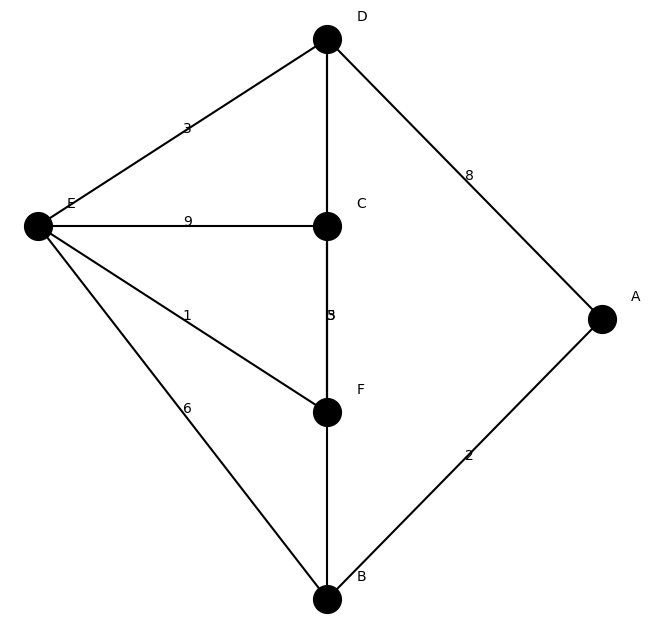

In [7]:
environment.show()


## Shortest Path from A

| Node | Shortest Distance from A | Previous Node |
|------|--------------------------|---------------|
| **A**    |  0   |     |
| _B_    | $\infty$ |     |
| C    | $\infty$ |     |
| _D_    | $\infty$ |     |
| E    | $\infty$ |     |
| F    | $\infty$ |     |

```
unvisited = [A,B,C,D,E,F]
```

| Node | Shortest Distance from A | Previous Node |
|------|--------------------------|---------------|
| **A**    |  0   |     |
| _B_  | 2 |  A    |
| C    | $\infty$ |     |
| _D_    | $\infty$ |     |
| E    | $\infty$ |     |
| F    | $\infty$ |     |

```
unvisited = [A,B,C,D,E,F]
```

| Node | Shortest Distance from A | Previous Node |
|------|--------------------------|---------------|
| **A**    |  0   |     |
| _B_    | 2 |  A    |
| C    | $\infty$ |     |
| _D_    | 8 |   A  |
| E    | $\infty$ |     |
| F    | $\infty$ |     |

```
unvisited = [B,C,D,E,F]
```

### Next node: B

| Node | Shortest Distance from A | Previous Node |
|------|--------------------------|---------------|
| A    |  0   |     |
| **B**    | **2** |  A    |
| C    | $\infty$ |     |
| _D_    | 8 |   A  |
| _E_    | $\infty$ |     |
| F    | $\infty$ |     |

```
unvisited = [B,C,D,E,F]
```

| Node | Shortest Distance from A | Previous Node |
|------|--------------------------|---------------|
| A    |  0   |     |
| **B**    | **2** |  A    |
| C    | $\infty$ |     |
| _D_    | _8_ |   A  |
| _E_    | _2+6_ |     |
| F    | $\infty$ |     |

```
unvisited = [B,C,D,E,F]
```

| Node | Shortest Distance from A | Previous Node |
|------|--------------------------|---------------|
| A    |  0   |     |
| **B**    | **2** |  A    |
| C    | $\infty$ |     |
| _D_   | _2+5_ |   B  |
| _E_    | _8_ |  B   |
| F    | $\infty$ |     |

```
unvisited = [B,C,D,E,F]
```

| Node | Shortest Distance from A | Previous Node |
|------|--------------------------|---------------|
| A    |  0   |     |
| **B**    | **2** |  A    |
| C    | $\infty$ |     |
| _D_   | _7_ |   B  |
| _E_    | _8_ |  B   |
| F    | $\infty$ |     |

```
unvisited = [C,D,E,F]
```

### Next Node: D

| Node | Shortest Distance from A | Previous Node |
|------|--------------------------|---------------|
| A    |  0   |     |
| B    | 2 |  A    |
| C    | $\infty$ |     |
| **D**   | **7** |   B  |
| _E_    | _8_ |  B   |
| _F_    | $\infty$ |     |

```
unvisited = [C,D,E,F]
```

| Node | Shortest Distance from A | Previous Node |
|------|--------------------------|---------------|
| A    |  0   |     |
| B    | 2 |  A    |
| C    | $\infty$ |     |
| **D**   | **7** |   B  |
| _E_    | _8_ |  B   |
| _F_    | _7+2_ |     |

```
unvisited = [C,D,E,F]
```

| Node | Shortest Distance from A | Previous Node |
|------|--------------------------|---------------|
| A    |  0   |     |
| B    | 2 |  A    |
| C    | $\infty$ |     |
| **D**   | **7** |   B  |
| _E_    | _7+3_ (> 8) |  B   |
| _F_    | _9_ |  D   |

```
unvisited = [C,D,E,F]
```

| Node | Shortest Distance from A | Previous Node |
|------|--------------------------|---------------|
| A    |  0   |     |
| B    | 2 |  A    |
| C    | $\infty$ |     |
| **D**   | **7** |   B  |
| _E_    | _8_ |  B   |
| _F_    | _9_ |  D   |

```
unvisited = [C,E,F]
```

### Next Node: E

| Node | Shortest Distance from A | Previous Node |
|------|--------------------------|---------------|
| A    |  0   |     |
| B    | 2 |  A    |
| _C_    | $\infty$ |     |
| D   | 7 |   B  |
| **E**    | **8** |  B   |
| _F_    | _9_ |  D   |

```
unvisited = [C,E,F]
```

| Node | Shortest Distance from A | Previous Node |
|------|--------------------------|---------------|
| A    |  0   |     |
| B    | 2 |  A    |
| _C_    | _8 + 9_ |     |
| D   | 7 |   B  |
| **E**    | **8** |  B   |
| _F_    | _9_ |  D   |

```
unvisited = [C,E,F]
```

| Node | Shortest Distance from A | Previous Node |
|------|--------------------------|---------------|
| A    |  0   |     |
| B    | 2 |  A    |
| _C_    | _17_ |  E   |
| D   | 7 |   B  |
| **E**    | **8** |  B   |
| _F_    | _8+1 (=9)_ |  D   |

```
unvisited = [C,E,F]
```

| Node | Shortest Distance from A | Previous Node |
|------|--------------------------|---------------|
| A    |  0   |     |
| B    | 2 |  A    |
| _C_    | _17_ |  E   |
| D   | 7 |   B  |
| **E**    | **8** |  B   |
| _F_    | _9_ |  D   |

```
unvisited = [C,F]
```

### Next Node: F

| Node | Shortest Distance from A | Previous Node |
|------|--------------------------|---------------|
| A    |  0   |     |
| B    | 2 |  A    |
| _C_    | _17_ |  E   |
| D   | 7 |   B  |
| E    | 8 |  B   |
| **F**    | **9** |  D   |

```
unvisited = [C,F]
```

| Node | Shortest Distance from A | Previous Node |
|------|--------------------------|---------------|
| A    |  0   |     |
| B    | 2 |  A    |
| _C_    | _9+3 (<17)_ |  E   |
| D   | 7 |   B  |
| E    | 8 |  B   |
| **F**    | **9** |  D   |

```
unvisited = [C,F]
```

| Node | Shortest Distance from A | Previous Node |
|------|--------------------------|---------------|
| A    |  0   |     |
| B    | 2 |  A    |
| _C_    | _12_ |  F   |
| D   | 7 |   B  |
| E    | 8 |  B   |
| **F**    | **9** |  D   |

```
unvisited = [C]
```

### Next Node: C

| Node | Shortest Distance from A | Previous Node |
|------|--------------------------|---------------|
| A    |  0   |     |
| B    | 2 |  A    |
| **C**    | **12** |  F   |
| D   | 7 |   B  |
| E    | 8 |  B   |
| F    | 9 |  D   |

```
unvisited = [C]
```

_No remaining unvisited neighbours_

| Node | Shortest Distance from A | Previous Node |
|------|--------------------------|---------------|
| A    |  0   |     |
| B    | 2 |  A    |
| **C**    | **12** |  F   |
| D   | 7 |   B  |
| E    | 8 |  B   |
| F    | 9 |  D   |

```
unvisited = []
```

## Shortest Path

```
def shortest_path(init, target, prev)
    u = target
    path = stack()
    path.push(u)
    while u is not init:
        u = prev[u]
        path.push(u)
    return path
```

C

F

D

B

A

In [8]:
from search.things import *

In [9]:
class ShortestPathEnvironment(GraphEnvironment):
    def get_node(self, node):
        if isinstance(node, Node):
            assert node in self.graph
        else:
            for vertex in self.graph:
                if node == vertex.label:
                    node = vertex
                    break
            assert isinstance(vertex, Node)
        return node
    
    def add_agent(self, agent, init, target):
        init = self.get_node(init)
        target = self.get_node(target)
        super().add_agent(agent, node=init)
        agent.initialise(init, target)

    @property
    def is_done(self):
        return (hasattr(self, "delivered") and self.delivered)

    
    def execute_action(self, agent, action):
        command, node = action
        match command:
            case "explore":
                agent.explore(node)
            case "deliver":
                if not hasattr(self, "shortest_path"):
                    self.shortest_path = {}
                self.shortest_path[agent.init] = {node: agent.deliver(node)}
                self.delivered = True

In [10]:
class ShortestPathAgent(UtilityBasedAgent):
    def __init__(self):
        super().__init__()
        self.dist = {}
        self.prev = {}
        self.visited = set()

    @property
    def at_goal(self):
        return self.location is self.target

    def initialise(self, node, target):
        self.init = node
        self.target = target
        self.dist[node] = 0
    
    def explore(self, node):  #actuator
        print(f"{self}: exploring {node}")
        print(f"      distance from {self.init}: {self.dist}")
        print(f"      previous node: {self.prev}")
        self.visited.add(self.location)
        self.location = node

    def deliver(self, node):
        path = []
        curr = node
        path.append(curr)
        while curr is not self.init:
            curr = self.prev[curr]
            path.append(curr)
        path = list(reversed(path))
        print(f"{self}: delivering shortest path between {self.init} and {node}")
        print(f"     {path}")
        print(f"  length: {self.dist[node]}")
        return path, self.dist[node]
        
    def program(self, percepts):
        if self.at_goal:
            return ("deliver", self.target)
        
        if isinstance(percepts, set):
            percepts = zip(nodes, [1]*len(nodes))
            
        for neighbour, weight in percepts:
            if neighbour in self.visited:
                continue
            if neighbour not in self.dist:
                self.dist[neighbour] = self.dist[self.location] + weight
                self.prev[neighbour] = self.location
            else:
                alt = self.dist[self.location] + weight
                if alt < self.dist[neighbour]:
                    self.dist[neighbour] = alt
                    self.prev[neighbour] = self.location
                    
        action = self.maximise_utility(
            [("explore", node) 
                 for node in self.dist if (
                     node is not self.location and
                     node not in self.visited)])
        
        return action

    def utility(self, action):
        value = self.dist[action[1]]
        return -value

In [11]:
environment = ShortestPathEnvironment.from_json(graph_json)

environment.add_agent(ShortestPathAgent(), init="A", target="C")
environment.run(pause_for_user=False)

ShortestPathEnvironment: Adding ❓ at A
ShortestPathEnvironment: Adding ❓ to list of agents.
ShortestPathEnvironment: Running for 100 iterations.
❓: exploring B
      distance from A: {A: 0, D: 8, B: 2}
      previous node: {D: A, B: A}
❓: exploring D
      distance from A: {A: 0, D: 7, B: 2, E: 8}
      previous node: {D: B, B: A, E: B}
❓: exploring E
      distance from A: {A: 0, D: 7, B: 2, E: 8, F: 9}
      previous node: {D: B, B: A, E: B, F: D}
❓: exploring F
      distance from A: {A: 0, D: 7, B: 2, E: 8, F: 9, C: 17}
      previous node: {D: B, B: A, E: B, F: D, C: E}
❓: exploring C
      distance from A: {A: 0, D: 7, B: 2, E: 8, F: 9, C: 12}
      previous node: {D: B, B: A, E: B, F: D, C: F}
❓: delivering shortest path between A and C
     [A, B, D, F, C]
  length: 12
ShortestPathEnvironment: Task environment complete. No further actions.
ShortestPathEnvironment: Simulation complete after 6 of 100 iterations.


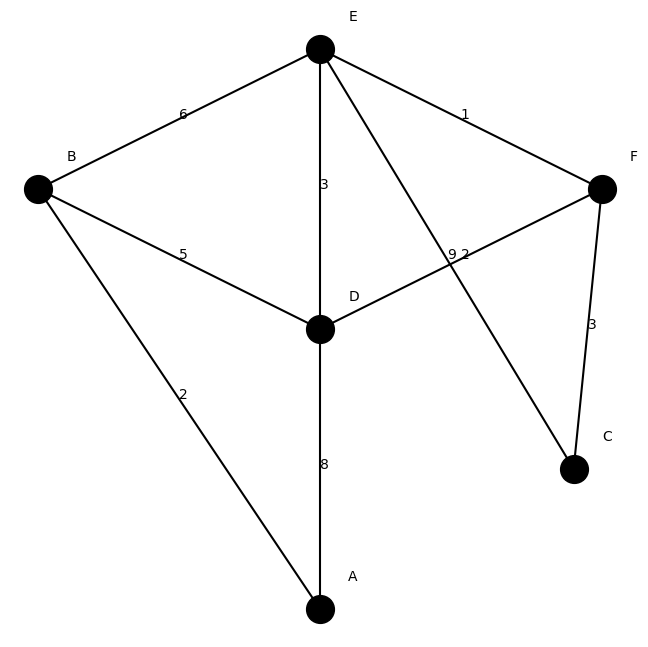

In [12]:
environment.show()

In [13]:
network = {
    "nodes": ["X0", "A", "B", "D", "F", "C", "E", "G", "H", "XG"],
    "edges": [
        ("X0","A"), ("A","B"), ("A","C"),
        ("B","D"),("D","F"),("D","G"),
        ("C","E"), ("E","G"), ("E","H"),
        ("H","XG")
    ],
    "weights": [2, 2, 5, 1, 1, 2, 3, 2, 1, 1]
}

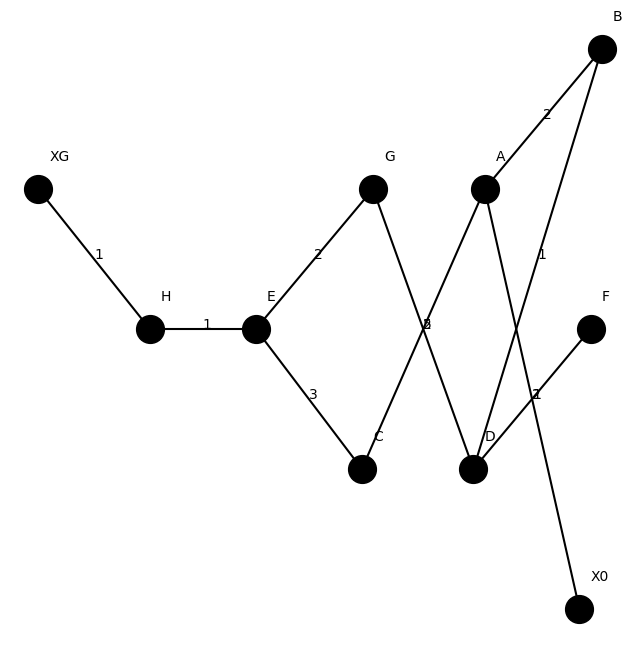

In [14]:
environment = ShortestPathEnvironment.from_dict(network)

environment.show()

In [15]:
environment.add_agent(ShortestPathAgent(), init="X0", target="XG")
environment.run(pause_for_user=False)

ShortestPathEnvironment: Adding ❓ at X0
ShortestPathEnvironment: Adding ❓ to list of agents.
ShortestPathEnvironment: Running for 100 iterations.
❓: exploring A
      distance from X0: {X0: 0, A: 2}
      previous node: {A: X0}
❓: exploring B
      distance from X0: {X0: 0, A: 2, B: 4, C: 7}
      previous node: {A: X0, B: A, C: A}
❓: exploring D
      distance from X0: {X0: 0, A: 2, B: 4, C: 7, D: 5}
      previous node: {A: X0, B: A, C: A, D: B}
❓: exploring F
      distance from X0: {X0: 0, A: 2, B: 4, C: 7, D: 5, G: 7, F: 6}
      previous node: {A: X0, B: A, C: A, D: B, G: D, F: D}
❓: exploring C
      distance from X0: {X0: 0, A: 2, B: 4, C: 7, D: 5, G: 7, F: 6}
      previous node: {A: X0, B: A, C: A, D: B, G: D, F: D}
❓: exploring G
      distance from X0: {X0: 0, A: 2, B: 4, C: 7, D: 5, G: 7, F: 6, E: 10}
      previous node: {A: X0, B: A, C: A, D: B, G: D, F: D, E: C}
❓: exploring E
      distance from X0: {X0: 0, A: 2, B: 4, C: 7, D: 5, G: 7, F: 6, E: 9}
      previous node:

In [16]:
network = {
    "nodes": ["Edinburgh", "Glasgow", "Manchester", "Liverpool",
             "Newcastle", "York", "Sheffield", "Leicester", 
             "London", "Bath", "Bristol", "Exeter", "Cardiff", "Birmingham"],
    "edges": [("Edinburgh", "Glasgow"), ("Glasgow", "Newcastle"),
             ("Edinburgh", "Newcastle"), ("Newcastle", "York"),
             ("Glasgow", "Manchester"), ("Manchester", "Liverpool"),
             ("York", "Sheffield"), ("York", "Leicester"),
             ("Sheffield", "Leicester"), ("Sheffield", "Birmingham"),
             ("Sheffield", "London"), ("Manchester", "Sheffield"),
             ("Manchester", "Birmingham"),  ("Birmingham", "Liverpool"),
             ("Birmingham", "Cardiff"), ("Leicester", "London"),
              ("Birmingham", "Leicester"),
             ("Birmingham", "London"), ("Birmingham", "Bristol"),
             ("London", "Bristol"), ("Cardiff", "Bristol")],
    "weights": [2,4,1,1,4,1,1,2,1,3,3,2,1,2,5,1,2,2,3,2,1]
    #[2,4,1,1,4,1,1,2,1,1,3,3,2,1,2,5,2,2,3,2,1,1]            
}

ShortestPathEnvironment: Adding ❓ at Sheffield
ShortestPathEnvironment: Adding ❓ to list of agents.
ShortestPathEnvironment: Running for 100 iterations.
❓: exploring Leicester
      distance from Sheffield: {Sheffield: 0, Leicester: 1, London: 3, York: 1, Birmingham: 3, Manchester: 2}
      previous node: {Leicester: Sheffield, London: Sheffield, York: Sheffield, Birmingham: Sheffield, Manchester: Sheffield}
❓: exploring York
      distance from Sheffield: {Sheffield: 0, Leicester: 1, London: 2, York: 1, Birmingham: 3, Manchester: 2}
      previous node: {Leicester: Sheffield, London: Leicester, York: Sheffield, Birmingham: Sheffield, Manchester: Sheffield}
❓: exploring London
      distance from Sheffield: {Sheffield: 0, Leicester: 1, London: 2, York: 1, Birmingham: 3, Manchester: 2, Newcastle: 2}
      previous node: {Leicester: Sheffield, London: Leicester, York: Sheffield, Birmingham: Sheffield, Manchester: Sheffield, Newcastle: York}
❓: exploring Manchester
      distance from She

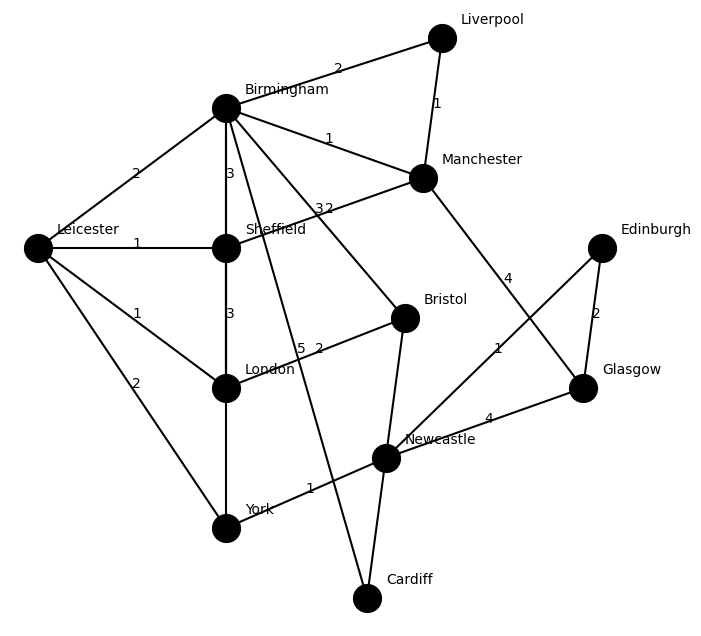

In [19]:
environment = ShortestPathEnvironment.from_dict(network)

environment.show()

environment.add_agent(ShortestPathAgent(), init="Sheffield", target="Cardiff")
environment.run(pause_for_user=False)